## Titanic data from kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
sns.set_style('whitegrid')
%matplotlib inline

## Get the Data
**Read in the titanic_df.csv file and set it to a data frame called ad_data.**

In [3]:
titanic_df=pd.read_csv('titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check the head of ad_data**

In [4]:
titanic_df.shape

(891, 12)

** Use info and describe() on ad_data**

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

Let's use seaborn to explore the data!



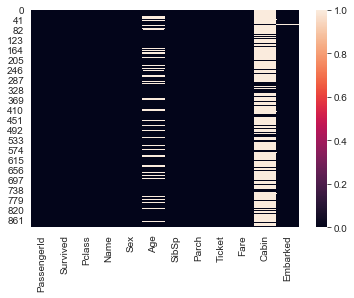

In [7]:
sns.heatmap(titanic_df.isnull())
#no null values present

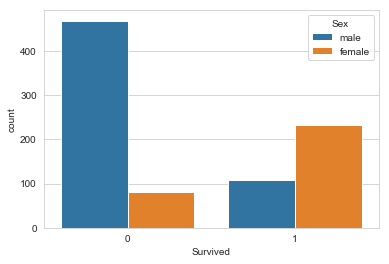

In [8]:
sns.countplot(x='Survived', data=titanic_df, hue='Sex')
#more female have survived compared tomale

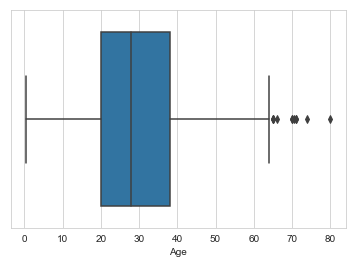

In [9]:
sns.boxplot(x='Age',data=titanic_df, hue='Sex')

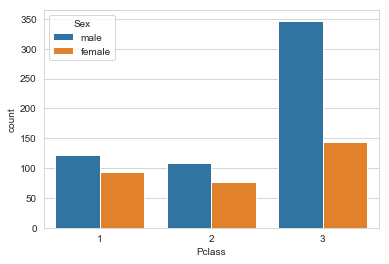

In [10]:
sns.countplot(x='Pclass', data=titanic_df,hue='Sex')

C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


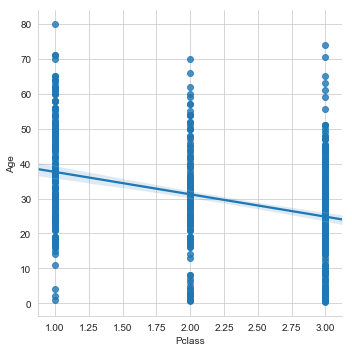

In [11]:
# sns.boxplot(y='Age', x='Pclass',data=titanic_df)
sns.lmplot(y='Age', x='Pclass',data=titanic_df)

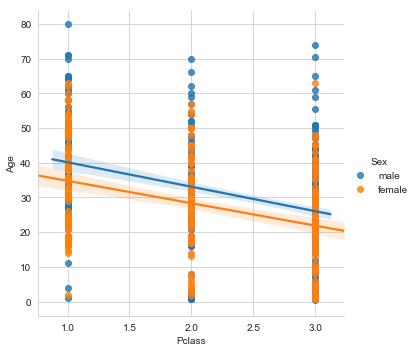

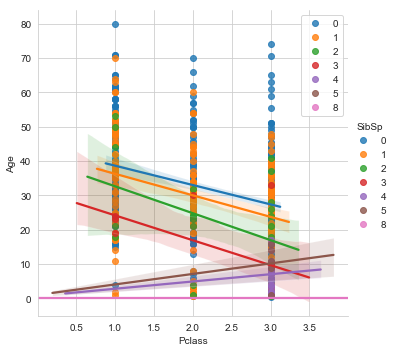

In [12]:
sns.lmplot(y='Age', x='Pclass',data=titanic_df,hue='Sex')
sns.lmplot(y='Age', x='Pclass',data=titanic_df,hue='SibSp')
plt.legend(bbox_to_anchor=(1,1))

In [13]:
def impute_age(col):
    
    if np.isnan(col[2]):
        if col[0]==1:
            if col[1]=='male':
                return 40
            else:
                return 36
        elif col[1]==2:
            if col[1]=='male':
                return 35
            else:
                return 28
        else:
            if col[1]=='male':
                return 27
            else:
                return 23
    else:
        return col[2]




In [14]:
titanic_df['Age']=titanic_df[['Pclass', 'Sex','Age']].apply(impute_age, axis=1)
#imputing age based on the analysis

In [15]:
titanic_df.drop(['Cabin'],axis=1, inplace=True)

In [16]:
print(titanic_df['Embarked'].isnull().sum())
print(titanic_df['Embarked'].value_counts())

2
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [17]:
titanic_df['Embarked'].fillna('S', inplace=True)

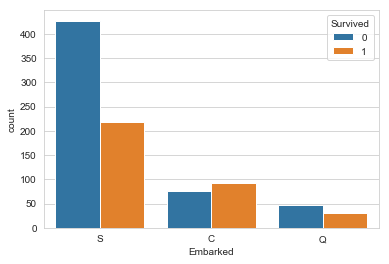

In [18]:
sns.countplot(x='Embarked', data=titanic_df, hue='Survived')
# sns.countplot(x='Embarked', data=titanic_df, hue='Sex')

** Finally, create a pairplot with the hue defined by the 'Survived' column feature.**

In [19]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']
titanic_df=titanic_df[features]
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


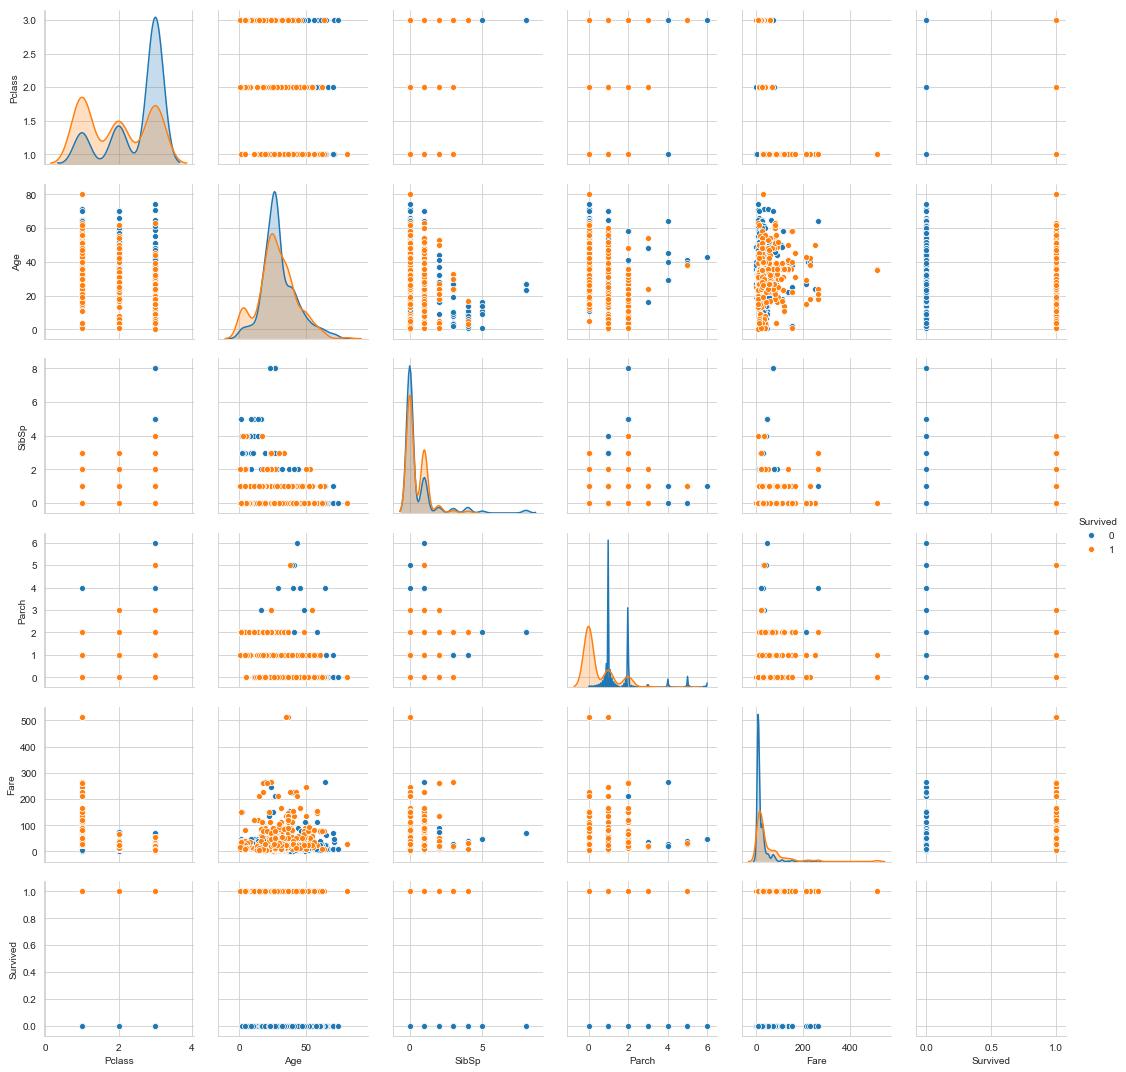

In [20]:
sns.pairplot(data=titanic_df,hue='Survived')

In [21]:
titanic_df[['Pclass','Fare']].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


In [22]:
sex_map={'male':0, 'female':1}
titanic_df['Sex']=titanic_df['Sex'].map(sex_map)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,3,1,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,3,0,35.0,0,0,8.0500,S,0


In [23]:
new_titanic=pd.concat([titanic_df, pd.get_dummies(titanic_df['Embarked'], prefix='Embarked_')], axis=1)
new_titanic.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Embarked__C,Embarked__Q,Embarked__S
0,3,0,22.0,1,0,7.2500,S,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,1,0,0
2,3,1,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,1,0,0,1
4,3,0,35.0,0,0,8.0500,S,0,0,0,1


In [24]:
new_titanic.drop(['Embarked'], axis=1, inplace=True)
new_titanic=new_titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked__C','Embarked__Q','Embarked__S','Survived']]
new_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Survived
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1
2,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,1,0


# Logistic Regression



In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [26]:
new_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Survived
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1
2,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,1,0


** Train and fit a logistic regression model on the training set.**

In [27]:
scaled_titanic=new_titanic.copy()
scaled_titanic=pd.DataFrame(scaler.fit_transform(new_titanic), columns=new_titanic.columns.tolist())
scaled_titanic.head()

C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S,Survived
0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,1.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,1.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,1.0
4,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0


In [28]:
X=new_titanic.iloc[:, :-1]
y=new_titanic.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=101,)

In [30]:
logmodel=LogisticRegression(penalty='l2',C=0.5 )
logmodel

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
logmodel.fit(X,y)

C:\Users\Kusumashree.VP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
print(classification_report(y_test, logmodel.predict(X_test)))
print(" Accuracy score", accuracy_score(y_test, logmodel.predict(X_test)))
confusion_matrix(y_test, logmodel.predict(X_test))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

   micro avg       0.81      0.81      0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90

 Accuracy score 0.8111111111111111


array([[46,  5],
       [12, 27]], dtype=int64)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [33]:
test_titanic=pd.read_csv('titanic/test.csv')
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
print(test_titanic.shape)

(418, 11)


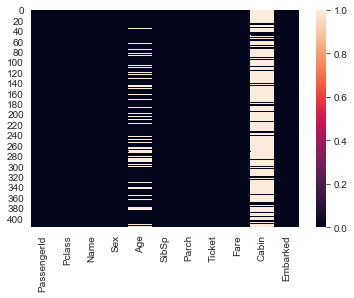

In [35]:
sns.heatmap(test_titanic.isnull())

In [37]:
test_titanic['Age']=test_titanic[['Pclass', 'Sex','Age']].apply(impute_age, axis=1)


In [38]:
test_titanic['Sex']=test_titanic['Sex'].map(sex_map)
test_titanic.drop('Cabin', axis=1, inplace=True)
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [39]:
test_new=pd.concat([test_titanic, pd.get_dummies(test_titanic['Embarked'], prefix='Embarked_')],\
                   axis=1, ignore_index=False)
# print(test_new.shape)
test_new.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked__C,Embarked__Q,Embarked__S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,0,1


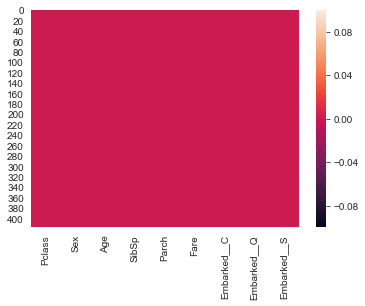

In [57]:
# sns.heatmap(np.nan(test_titanic).sum())
sns.heatmap(test_new.isna())

In [40]:
print(test_new.shape)
print(test_titanic.shape)

(418, 13)
(418, 10)


In [41]:
test_new=test_new[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked__C','Embarked__Q','Embarked__S']]
test_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [42]:
test_new[test_new['Fare'].isnull()].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
152,3,0,60.5,0,0,NaN,0,0,1


In [43]:
test_new[test_new['Pclass']==3]['Fare'].mean(skipna=True)

12.459677880184334

In [44]:
#impute fare amount
test_new.loc[test_new['Fare'].isnull(),'Fare']=test_new[test_new['Pclass']==3]['Fare'].mean(skipna=True)

In [45]:
predictions=logmodel.predict(test_new)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
#map the passenger_id with predictions and write_csv
pd.DataFrame( predictions,test_titanic['PassengerId'], columns=[ 'Survived'],).to_csv('titanic/logistic_4.csv')

## Great Job!

## KNearestClassifier-knearestNeighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
k_neighbors=KNeighborsClassifier(n_neighbors=1)
k_neighbors.fit(X_train,y_train)
pred_1=k_neighbors.predict(X_test)
print("k=",1)
print(classification_report(y_test, pred_1))
print(accuracy_score(y_test, pred_1))
confusion_matrix(y_test, pred_1)

k= 1
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        51
           1       0.75      0.62      0.68        39

   micro avg       0.74      0.74      0.74        90
   macro avg       0.75      0.73      0.73        90
weighted avg       0.75      0.74      0.74        90

0.7444444444444445


array([[43,  8],
       [15, 24]], dtype=int64)

In [51]:
error=[]
for i in range(1, 100):
    k_neighbor_i=KNeighborsClassifier(n_neighbors=i)
    k_neighbor_i.fit(X_train, y_train)
    pred_i=k_neighbor_i.predict(X_test)
    error.append(np.mean(y_test!=pred_i))
    

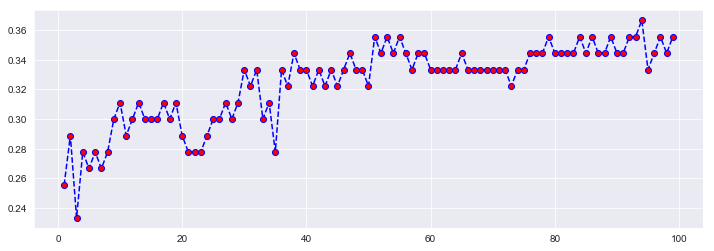

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
plt.plot(range(1,100), error, marker='o', ls='--', markerfacecolor='r', c='b')

In [56]:
k_neighbors_3=KNeighborsClassifier(n_neighbors=3)
k_neighbors_3.fit(X_train,y_train)
pred_3=k_neighbors.predict(X_test)
print("k=",3)
print(classification_report(y_test, pred_3))
print(accuracy_score(y_test, pred_3))
confusion_matrix(y_test, pred_3)

k= 3
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        51
           1       0.75      0.62      0.68        39

   micro avg       0.74      0.74      0.74        90
   macro avg       0.75      0.73      0.73        90
weighted avg       0.75      0.74      0.74        90

0.7444444444444445


array([[43,  8],
       [15, 24]], dtype=int64)

# DECISION TREE


In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=6,presort=True, min_impurity_decrease=0.0,random_state=101 )
# dt_model=DecisionTreeClassifier(max_depth=2)

In [67]:
dt_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=True, random_state=101, splitter='best')

In [68]:
dt_model.score(X_test, y_test)

0.7666666666666667

In [69]:
dt_pred=dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))
print(accuracy_score(y_test, dt_pred))
confusion_matrix(y_test, dt_pred)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        51
           1       0.80      0.62      0.70        39

   micro avg       0.77      0.77      0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90

0.7666666666666667


array([[45,  6],
       [15, 24]], dtype=int64)

In [70]:
DT_classification=dt_model.predict(test_new)

In [71]:
DT_classification

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
pd.DataFrame( DT_classification,test_titanic['PassengerId'], columns=[ 'Survived'],).to_csv('titanic/dt1.csv')

### Randomforest classifier


In [84]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier(n_estimators=10)

In [85]:
Rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
Rf_model.score(X_test, y_test)

0.9555555555555556

In [88]:
Rf_pred=Rf_model.predict(X_test)
print(classification_report(y_test, Rf_pred))
print(accuracy_score(y_test, Rf_pred))
confusion_matrix(y_test, Rf_pred)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.90      0.95        39

   micro avg       0.96      0.96      0.96        90
   macro avg       0.96      0.95      0.95        90
weighted avg       0.96      0.96      0.96        90

0.9555555555555556


array([[51,  0],
       [ 4, 35]], dtype=int64)

In [89]:
RF_classification=Rf_model.predict(test_new)

In [90]:
RF_classification

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
pd.DataFrame( RF_classification,test_titanic['PassengerId'], columns=[ 'Survived'],).to_csv('titanic/Random_Forest2.csv')

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7666666666666667